# Rock, paper or scissor game

1.   Import data



In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-05-11 06:58:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   127MB/s    in 1.5s    

2019-05-11 06:58:15 (127 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-05-11 06:58:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [7]:
!cd /tmp && rm -rf *.zip && ls -l

total 8
drwxr-xr-x 5 root root 4096 May 11 06:59 rps
drwxr-xr-x 5 root root 4096 May 11 06:59 rps-test-set


In [9]:
!cd /tmp/rps && ls -l

total 108
drwxr-xr-x 2 root root 36864 May 11 06:59 paper
drwxr-xr-x 2 root root 36864 May 11 06:59 rock
drwxr-xr-x 2 root root 36864 May 11 06:59 scissors


In [12]:
!cd /tmp/rps/paper && ls -l | wc -l

841


In [13]:
!cd /tmp/rps/rock && ls -l | wc -l

841


In [15]:
!cd /tmp/rps/scissors && ls -l | wc -l

841


In [16]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-003.png', 'rock02-098.png', 'rock02-070.png', 'rock03-103.png', 'rock01-016.png', 'rock05ck01-089.png', 'rock01-025.png', 'rock03-038.png', 'rock04-024.png', 'rock07-k03-067.png']
['paper06-061.png', 'paper06-033.png', 'paper04-077.png', 'paper01-109.png', 'paper07-116.png', 'paper06-089.png', 'paper01-097.png', 'paper03-025.png', 'paper06-112.png', 'paper01-008.png']
['scissors03-065.png', 'scissors03-096.png', 'scissors04-018.png', 'scissors02-002.png', 'scissors03-097.png', 'scissors02-054.png', 'scissors01-035.png', 'scissors01-112.png', 'scissors04-100.png', 'scissors02-053.png']


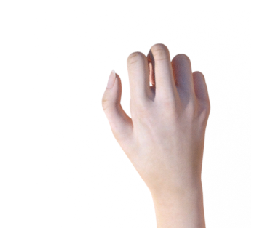

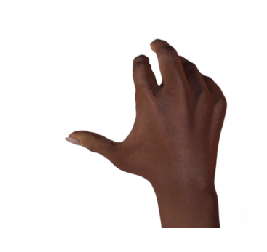

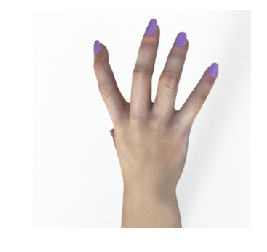

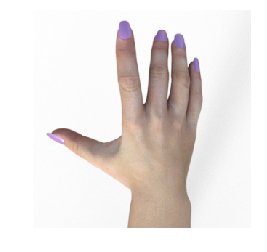

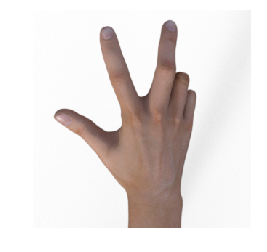

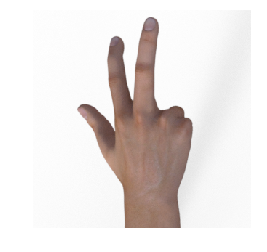

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

2.   Data augmentantion and data flow generator


In [19]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


3. Create the model


In [20]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

4. Training the mode

In [23]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
79/79 [==============================] - 25s 317ms/step - loss: 1.1719 - acc: 0.3611 - val_loss: 1.0756 - val_acc: 0.3333
Epoch 2/25
79/79 [==============================] - 21s 262ms/step - loss: 0.8919 - acc: 0.5821 - val_loss: 0.2681 - val_acc: 0.9355
Epoch 3/25
79/79 [==============================] - 21s 260ms/step - loss: 0.5995 - acc: 0.7417 - val_loss: 0.5472 - val_acc: 0.7016
Epoch 4/25
79/79 [==============================] - 21s 261ms/step - loss: 0.3821 - acc: 0.8433 - val_loss: 0.0583 - val_acc: 1.0000
Epoch 5/25
79/79 [==============================] - 22s 278ms/step - loss: 0.3050 - acc: 0.8806 - val_loss: 0.1387 - val_acc: 0.9355
Epoch 6/25
79/79 [==============================] - 21s 268ms/step - loss: 0.2514 - acc: 0.9095 - val_loss: 0.0535 - val_acc: 0.9731
Epoch 7/25
79/79 [==============================] - 21s 260ms/step - loss: 0.1883 - acc: 0.9345 - val_loss: 0.0929 - val_acc: 0.9624
Epoch 8/25
79/79 [===

5. Saving the model

In [0]:
model.save("rps.h5")

6. Evaluating accuracy across training

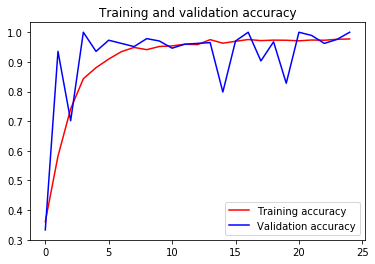

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

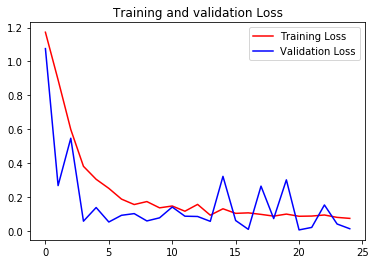

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

7. Let's play!

In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
classes_names = ['stone', 'paper', 'scissor']

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  #print(np.argmax(classes[0]))
  #print(classes)
  print(classes_names[np.argmax(classes[0])])

Saving paper01-001.png to paper01-001.png
paper01-001.png
stone


8. Takig our own pics from camera

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

paper01-001.png
scissor
Saved to photo.jpg


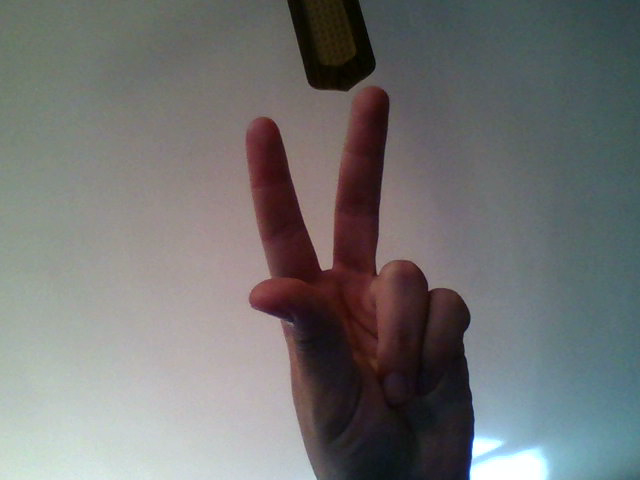

In [50]:
from IPython.display import Image
try:
  filename = take_photo()
  img = image.load_img(filename, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes_names[np.argmax(classes[0])])
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))